In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/distan_lat42.896lon-8.415p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
import pandas as pd
import numpy as np

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/LESTY2018Y2022.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
print("Weather frequencies\n")
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))

Weather frequencies



M                  73.21%
-RA                 6.38%
BCFG                5.29%
FG                  1.93%
BR                  1.70%
RA                  1.63%
-SHRA               1.60%
VCFG                1.29%
-DZ                 1.14%
SHRA                0.68%
-RA BR              0.54%
-RADZ               0.49%
-DZ BCFG            0.48%
-DZ BR              0.45%
-RA BCFG            0.39%
VCSH                0.24%
RA BR               0.17%
+RA                 0.16%
-RADZ BR            0.15%
-RADZ BCFG          0.15%
BCFG -DZ            0.15%
DZ BR               0.13%
-DZ FG              0.11%
PRFG                0.10%
DZ                  0.10%
+SHRA               0.09%
DZ BCFG             0.09%
FZFG                0.07%
MIFG                0.07%
VCTS                0.07%
TS                  0.06%
RA BCFG             0.06%
-TSRA               0.04%
BR -DZ              0.04%
-DZRA               0.04%
BCFG -RA            0.04%
FG -DZ              0.03%
BR -RA              0.03%
TSRA        

In [3]:
#label ra/dz

station["prec_l"] = "No RA/DZ"
mask = station['wxcodes_o'].str.contains("RA")
station.loc[mask,["prec_l"]] = "RA/DZ"
mask = station['wxcodes_o'].str.contains("DZ")
station.loc[mask,["prec_l"]] = "RA/DZ"

print(station.sample(50))
print("*****************************")
station["prec_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x))

                      wxcodes_o    prec_l
time                                     
2021-03-17 01:00:00           M  No RA/DZ
2020-11-25 04:30:00           M  No RA/DZ
2020-01-28 19:30:00  -RADZ BCFG     RA/DZ
2018-11-22 14:30:00           M  No RA/DZ
2021-07-26 07:30:00        BCFG  No RA/DZ
2018-03-15 08:30:00           M  No RA/DZ
2020-04-29 18:00:00           M  No RA/DZ
2021-02-16 19:00:00           M  No RA/DZ
2019-10-20 13:30:00           M  No RA/DZ
2022-05-08 03:00:00           M  No RA/DZ
2021-04-28 06:00:00           M  No RA/DZ
2022-03-05 02:30:00           M  No RA/DZ
2022-09-09 23:00:00           M  No RA/DZ
2021-06-21 09:00:00           M  No RA/DZ
2022-08-09 23:30:00           M  No RA/DZ
2018-07-31 06:30:00        BCFG  No RA/DZ
2019-12-15 10:30:00         -RA     RA/DZ
2019-06-07 20:30:00           M  No RA/DZ
2018-01-04 19:00:00         -RA     RA/DZ
2018-11-23 06:30:00        SHRA     RA/DZ
2018-02-26 15:00:00           M  No RA/DZ
2022-02-15 19:00:00           M  N

No RA/DZ    84%
RA/DZ       16%
Name: prec_l, dtype: object

**Load model**

In [4]:
#Forecast d
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD1Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD1Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD1Y2020.csv",parse_dates=["time"])
mody2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD1Y2021.csv",parse_dates=["time"])
mody2022 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD1Y2022.csv",parse_dates=["time"])
model1k = pd.concat([mody2018,mody2019,mody2020,mody2021,mody2022]).drop(columns=["Unnamed: 0"]).set_index("time")

model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,233.963104,0.0,1431.277588,8.529214,12.747702,103069.140625,284.533936,0.996536,14435.375977,-2.462172,...,27.370001,-0.000438,0.500000,0.624215,0.000000,0.624215,5684.005859,1578.303955,254.901123,277.214264
2018-01-02 01:00:00,232.617645,0.0,1450.688721,9.038249,13.097809,103024.101562,284.793640,0.991839,13233.881836,-1.087396,...,30.280001,-0.000438,0.000000,0.652011,0.000000,0.652011,5682.228027,1575.284058,255.174683,277.385498
2018-01-02 02:00:00,229.386154,0.0,1506.658691,9.148539,13.241504,102974.367188,284.805237,0.992409,12632.814453,-0.456407,...,8.658000,-0.000105,0.000000,0.703125,0.100000,0.703125,5680.491211,1573.386963,255.084564,278.089752
2018-01-02 03:00:00,224.010574,0.0,1530.089111,9.545937,13.720991,102908.781250,284.816742,0.996087,1235.833618,-0.508618,...,2.990000,-0.000125,0.000000,0.769529,0.200000,0.769529,5680.566895,1570.076050,254.978058,278.433868
2018-01-02 04:00:00,220.319962,0.0,1629.957764,8.721576,12.831500,102884.570312,284.905121,0.993239,14433.916016,-0.312250,...,1.244000,0.000562,0.296875,0.609375,0.600000,0.609375,5681.469238,1570.291016,255.305695,279.794739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 19:00:00,214.925400,0.0,1412.834229,3.840020,6.224229,101509.250000,282.401367,0.977776,24046.664062,1.376939,...,96.820000,-0.491957,0.300000,0.332929,0.000000,0.332929,5466.016113,1465.733032,252.778397,275.171875
2023-01-01 20:00:00,218.536026,0.0,1334.450562,3.384263,5.884864,101589.906250,282.391235,0.980421,24048.144531,1.292046,...,144.880005,-0.000320,0.100000,0.449521,0.000000,0.449521,5461.431152,1470.889771,251.670898,274.828064
2023-01-01 21:00:00,218.298325,0.0,1293.848755,3.525374,6.237169,101673.679688,282.288635,0.982895,24051.210938,0.569344,...,218.940002,0.002969,0.500000,0.357450,0.015625,0.500000,5455.578125,1474.774048,250.488861,274.894684


In [5]:
#concat station file versus meteorological model file same time
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o"]).dropna()
df_all1k.sample(20)

,prec_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2019-10-30 20:00:00,No RA/DZ,226.837418,0.0,2600.394287,3.427395,5.417229,102140.015625,289.360992,0.999988,33.468922,...,120.169998,-0.496992,0.300000,0.593125,0.515625,0.593125,5708.101074,1548.962524,260.959442,284.423309
2019-01-14 20:00:00,No RA/DZ,32.080715,0.0,1596.056885,2.708126,3.920838,102642.562500,279.950928,0.985541,24039.349609,...,0.000000,-0.000044,0.200000,0.000000,0.000000,0.200000,5674.356934,1543.984741,255.405563,280.258301
2022-08-05 18:00:00,No RA/DZ,41.461788,0.0,3223.014893,7.025670,9.878812,101804.398438,294.514862,0.779469,24233.855469,...,0.000000,0.001523,0.200000,0.000000,0.000000,0.200000,5776.591797,1549.006348,263.312073,290.316132
2018-09-12 20:00:00,No RA/DZ,1.157580,0.0,2872.009766,5.283918,7.570186,102314.914062,290.315674,0.978946,24234.671875,...,1.590000,-0.001680,0.000000,0.434503,0.000000,0.434503,5811.729492,1577.458740,263.744385,289.669861
2019-11-19 16:00:00,RA/DZ,192.497498,0.0,1453.340820,4.408903,8.050376,100930.015625,282.190613,0.980557,7086.108398,...,0.520000,0.000898,0.359375,0.421183,0.468750,0.468750,5460.525879,1439.265015,250.871628,277.395691
2022-06-25 20:00:00,No RA/DZ,256.778656,0.0,1652.013184,4.257551,6.716230,101632.046875,285.448547,0.789241,24047.269531,...,0.000000,0.000199,0.000000,0.000000,0.000000,0.000000,5539.457031,1484.418579,255.480164,276.986176
2021-10-13 05:00:00,No RA/DZ,88.807259,0.0,2864.216064,3.416341,5.766106,102086.382812,282.250610,0.806988,24135.000000,...,0.000000,0.000742,0.000000,0.000000,0.000000,0.000000,5730.073730,1546.941528,260.649139,287.155762
2021-01-30 20:00:00,RA/DZ,273.497070,0.0,1401.533081,7.465188,15.850848,101447.562500,282.114807,0.910520,15436.672852,...,3.410000,-1.158574,0.093750,1.000000,0.700000,1.000000,5502.360840,1456.427002,256.672577,274.904694
2022-06-23 01:00:00,No RA/DZ,16.256969,0.0,2015.603760,2.092955,3.134227,101325.000000,285.347443,0.989555,235.912140,...,2.990000,-0.003164,0.000000,0.677870,0.000000,0.677870,5555.002930,1474.890869,253.998001,281.102875


**Scatter plot significant meteorological variables and prec_l**

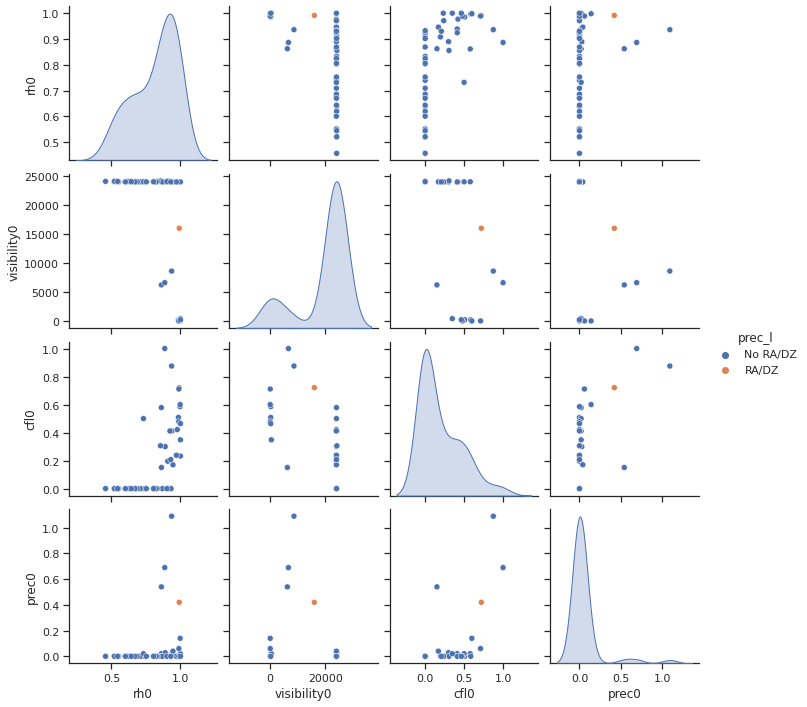

In [6]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["prec_l","rh0","visibility0","cfl0","prec0"]].sample(50), hue="prec_l");

**Scatter plot 3 PCA variables and prec_l**

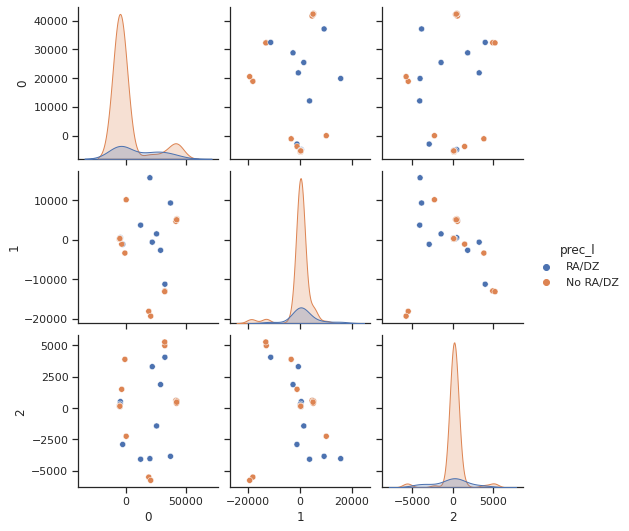

In [7]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["prec_l"] = df_all1k.prec_l
sns.pairplot(df_pca.sample(100), hue="prec_l");

**Meteorological model score Heidke Skill Score (HSS)**

In [8]:
from sklearn.metrics import classification_report

# HSS point 0
print("HSS point 0")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec0])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met0 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met0,2))

print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

# HSS point 1
print("\nHSS point 1")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec1])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met1 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met1,2))

print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

HSS point 0
y_pred    No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     28191   9058  37249
RA/DZ          970   5259   6229
All          29161  14317  43478
Heidke Skill Score: 0.39

Quality report Meteorological model point 0
              precision    recall  f1-score       support
No RA/DZ       0.966736  0.756826  0.848999  37249.000000
RA/DZ          0.367326  0.844277  0.511924   6229.000000
accuracy       0.769355  0.769355  0.769355      0.769355
macro avg      0.667031  0.800551  0.680462  43478.000000
weighted avg   0.880860  0.769355  0.800707  43478.000000

HSS point 1
y_pred    No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     28013   9236  37249
RA/DZ         1167   5062   6229
All          29180  14298  43478
Heidke Skill Score: 0.37

Quality report Meteorological model point 1
              precision    recall  f1-score      support
No RA/DZ       0.960007  0.752047  0.843397  37249.00000
RA/DZ          0.354036  0.812651  0.493204

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [9]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")


p-value: 0.0
Significance level: 0.01
Degres of of freedom:  1
Stadistic 7707.7850296695315
Reject H0,There is an association between machine learning forecast and observed values


In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:10<00:00,  2.44s/it]


In [ ]:
models

**ML LGBMClassifier**

In [10]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'dir3', 'snow_prec3', 'snowlevel3', 'mod3', 'wind_gust3', 'mslp3',
       'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3',
       'prec3', 'swflx3', '


Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      6890    586  7476
RA/DZ          453    767  1220
All           7343   1353  8696
Heidke Skill Score: 0.53

Quality report (Machine Learning)

              precision    recall  f1-score     support
No RA/DZ       0.938309  0.921616  0.929887  7476.00000
RA/DZ          0.566888  0.628689  0.596191  1220.00000
accuracy       0.880520  0.880520  0.880520     0.88052
macro avg      0.752598  0.775152  0.763039  8696.00000
weighted avg   0.886200  0.880520  0.883072  8696.00000

Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      6910    545  7455
RA/DZ          460    781  1241
All           7370   1326  8696
Heidke Skill Score: 0.54

Quality report (Machine Learning)

              precision    recall  f1-score     support
No RA/DZ       0.937585  0.926895  0.932209  7455.00000
RA/DZ          0.588989  0.62933

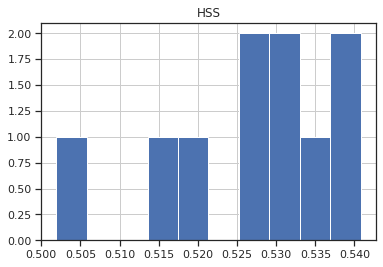

In [11]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

sta, p = shapiro(HSS_ml)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_ml,columns=["HSS"]).hist();


**T test (1sample) compare machine learning HSS in a sample (n=10) versus meteorological model HSS at point 0 (0.39) and at point 1 (0.37). the alternative hypothesis is: the mean of HSS of the underlying distribution of the sample is greater than the given population HSS from meteorological model (popmean). Significance level (alpha) = 0.01**

In [12]:
import scipy.stats as stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(HSS_ml, popmean=0.39, alternative="greater")

print("\nalpha: ",alpha)
print("\nHSS list from machine learning test:",np.round(HSS_ml,2))
print("\np_value point 0:",p_value0)

if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 HSS mean machine learning = HSS meteorological model point 0")





alpha:  0.01

HSS list from machine learning test: [0.53 0.54 0.51 0.52 0.53 0.53 0.53 0.54 0.53 0.5 ]

p_value point 0: 2.213317633240889e-11

we are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0

we are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0


**Add time features**

In [13]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

In [ ]:

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

In [14]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)

**LGBMClassifier with time variables**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      6923    553  7476
RA/DZ          430    790  1220
All           7353   1343  8696
Heidke Skill Score: 0.55

Quality report (Machine Learning)

              precision    recall  f1-score     support
No RA/DZ       0.941520  0.926030  0.933711  7476.00000
RA/DZ          0.588235  0.647541  0.616465  1220.00000
accuracy       0.886960  0.886960  0.886960     0.88696
macro avg      0.764878  0.786785  0.775088  8696.00000
weighted avg   0.891957  0.886960  0.889203  8696.00000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      6921    534  7455
RA/DZ          454    787  1241
All           7375   1321  8696
Heidke Skill Score: 0.55

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.938441  0.928370  0.933378  7455.000000
RA/DZ          0.595761  0.63416

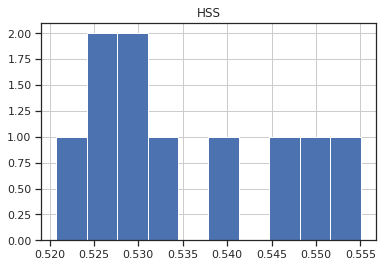

In [15]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_t = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS"]).hist();


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [16]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_ml, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS_ml,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.526 0.541 0.515 0.518 0.527 0.53  0.534 0.539 0.531 0.502]

HSS with time variables: [0.55  0.548 0.525 0.529 0.527 0.529 0.534 0.555 0.54  0.521]

alpha:  0.01

p_value point:  0.00238727762379601

we are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables

we are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs


In [17]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")
     

dir0: 1.0%
snow_prec0: 0.0%
snowlevel0: 0.8%
mod0: 0.9%
wind_gust0: 1.0%
mslp0: 0.9%
temp0: 0.9%
rh0: 1.2%
visibility0: 1.2%
lhflx0: 0.9%
lwflx0: 1.1%
conv_prec0: 0.2%
prec0: 3.1%
swflx0: 0.7%
shflx0: 1.2%
cape0: 1.3%
cin0: 1.2%
cfh0: 1.4%
cfl0: 0.9%
cfm0: 1.2%
cft0: 0.7%
HGT5000: 0.9%
HGT8500: 1.1%
T5000: 0.9%
T8500: 1.0%
dir1: 1.6%
snow_prec1: 0.0%
snowlevel1: 0.7%
mod1: 0.9%
wind_gust1: 1.1%
mslp1: 0.7%
temp1: 0.5%
rh1: 1.1%
visibility1: 1.3%
lhflx1: 0.8%
lwflx1: 0.8%
conv_prec1: 0.7%
prec1: 1.8%
swflx1: 0.5%
shflx1: 0.8%
cape1: 1.0%
cin1: 1.1%
cfh1: 1.1%
cfl1: 1.1%
cfm1: 1.0%
cft1: 1.3%
HGT5001: 0.4%
HGT8501: 0.8%
T5001: 0.5%
T8501: 0.7%
dir2: 1.6%
snow_prec2: 0.0%
snowlevel2: 0.6%
mod2: 0.9%
wind_gust2: 0.8%
mslp2: 0.6%
temp2: 0.9%
rh2: 1.0%
visibility2: 1.1%
lhflx2: 0.8%
lwflx2: 1.2%
conv_prec2: 0.6%
prec2: 2.1%
swflx2: 0.9%
shflx2: 1.0%
cape2: 1.1%
cin2: 1.3%
cfh2: 1.1%
cfl2: 1.2%
cfm2: 0.8%
cft2: 1.7%
HGT5002: 0.5%
HGT8502: 0.7%
T5002: 0.5%
T8502: 0.9%
dir3: 1.2%
snow_prec3: 0.

****

**Save Machine learning model**

In [18]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_LEST_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [19]:
import sklearn
print(sklearn.__version__)
print(pd.__version__)

1.2.2
1.4.4


**ExtraTreesClassifier too big to be upload at github!!**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      6867    609  7476
RA/DZ          326    894  1220
All           7193   1503  8696
Heidke Skill Score: 0.59

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.954678  0.918539  0.936260  7476.000000
RA/DZ          0.594810  0.732787  0.656629  1220.000000
accuracy       0.892479  0.892479  0.892479     0.892479
macro avg      0.774744  0.825663  0.796444  8696.000000
weighted avg   0.904191  0.892479  0.897029  8696.000000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      6774    640  7414
RA/DZ          349    933  1282
All           7123   1573  8696
Heidke Skill Score: 0.59

Quality report (Machine Learning)

              precision    recall  f1-score     support
No RA/DZ       0.951004  0.913677  0.931967  7414.00000
RA/DZ          0.593134  0.7

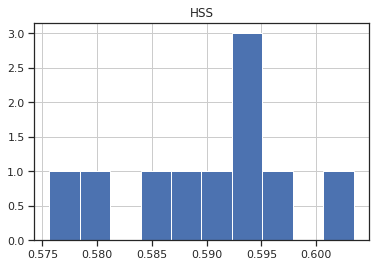

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [21]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS with LGBMClassifier:", np.round(HSS_t,3))
print("\nHSS with ExtraTreesClassifier:", np.round(HSS_plus,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: LGBMClassifier = HSS mean ExtraTreesClassifier")


HSS with LGBMClassifier: [0.55  0.548 0.525 0.529 0.527 0.529 0.534 0.555 0.54  0.521]

HSS with ExtraTreesClassifier: [0.594 0.586 0.594 0.592 0.58  0.597 0.603 0.595 0.576 0.588]

alpha:  0.01

p_value point:  3.196047585507345e-07

we are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier

we are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier
